In [2]:
import numpy as np
from  datascience import *
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings

# Predicciones


¿Podemos predecir qué tan alto crecerá un niño basándonos en la altura de sus padres?


Para hacer esto, utilizaremos el famoso conjunto de datos de altura de Galton, que se recopiló para demostrar la conexión entre la altura de los padres y la altura de sus hijos.

Referencias: https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html

In [3]:
altura = Table().read_table("family_heights.csv")
altura.labels

('family', 'father', 'mother', 'child', 'children', 'order', 'sex')

In [4]:
altura

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


Construyamos una funcion para travajar en centimetros

In [5]:
def pulgadas_to_cm(x):
    return x*2.54

In [6]:
altura = Table().read_table("family_heights.csv")
altura

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [7]:
altura = Table().read_table("family_heights.csv")
altura = altura.with_column("father",  altura.apply(pulgadas_to_cm, "father"))
altura = altura.with_column("mother",  altura.apply(pulgadas_to_cm, "mother"))
altura = altura.with_column("child",  altura.apply(pulgadas_to_cm, "child"))
altura = altura.with_column("AverageParents", 0.5*(altura.column("father")+altura.column("mother")) )

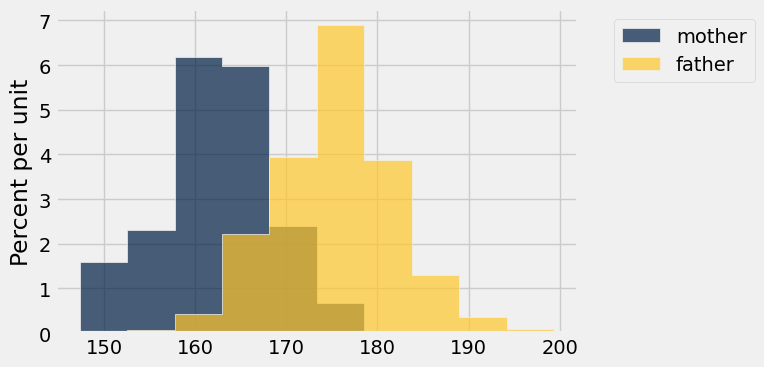

In [8]:
altura.hist("mother", "father")

In [9]:
alt = altura.select("AverageParents", "child")

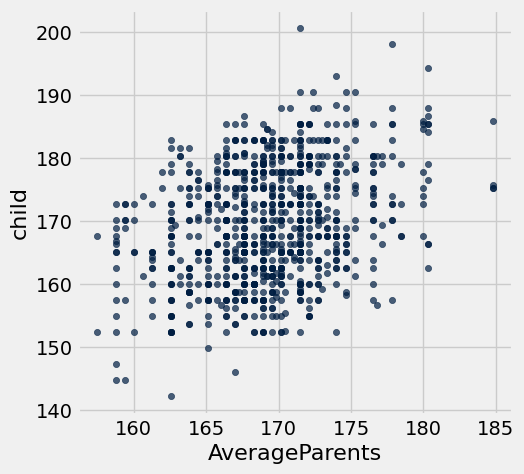

In [10]:
alt.scatter("AverageParents", "child")

Dada una altura de un padre, alrededor de 170cm, ¿cuál es la atura de los hijos?

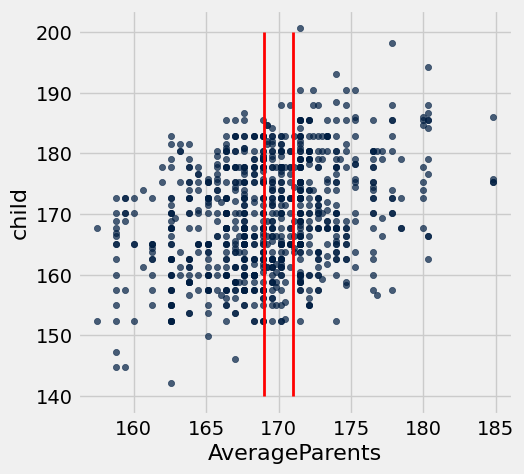

In [11]:
alt.scatter("AverageParents", "child")
plt.vlines(169, ymin=140, ymax=200, color="red", linewidth=2)
plt.vlines(171, ymin=140, ymax=200, color="red", linewidth=2)

In [12]:
cercana_170 = alt.where("AverageParents",are.between(169, 171))
np.mean(cercana_170.column("child"))

169.76540645161293

Altura promedio de un niño de padres que tiene una altura promedio, comprendida entre 169cm y 171cm

In [13]:
altura = Table().read_table("family_heights.csv")
altura.labels

('family', 'father', 'mother', 'child', 'children', 'order', 'sex')

In [14]:
altura

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------

# Operación `Group`

# Operacion Group y pivot

Construyamos un modelo, con esta primera intuición

In [15]:
# Crear la tabla
satisfaccion = Table().with_columns(
    'Individuo', make_array('Persona 1', 'Persona 2', 'Persona 3', 'Persona 4', 'Persona 5', 'Persona 6', 'Persona 7', 'Persona 8'),
    'Practica Ejercicio', make_array('Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No'),
    'Satisfacción con la Vida (1-10)', make_array(8, 5, 7, 4, 9, 6, 7, 3),
    'Horas de Ejercicio por Semana', make_array(5, 0, 6, 0, 4, 0, 7, 0)
)

satisfaccion.show()


Individuo,Practica Ejercicio,Satisfacción con la Vida (1-10),Horas de Ejercicio por Semana
Persona 1,Sí,8,5
Persona 2,No,5,0
Persona 3,Sí,7,6
Persona 4,No,4,0
Persona 5,Sí,9,4
Persona 6,No,6,0
Persona 7,Sí,7,7
Persona 8,No,3,0


In [16]:
satisfaccion.group("Practica Ejercicio")

Practica Ejercicio,count
No,4
Sí,4


Otro ejemplo:

Supongamos que tenemos la siguiente tabla de libros clasicos: 

In [17]:
# Crear la tabla con 20 libros
libros = Table().with_columns(
    'Titulo', make_array(
        'Cien Años de Soledad', 'El Quijote', '1984', 'Orgullo y Prejuicio', 'Crimen y Castigo', 
        'El Principito', 'Don Juan Tenorio', 'Matar a un Ruiseñor', 'La Odisea', 'El Gran Gatsby',
        'Fahrenheit 451', 'La Metamorfosis', 'El Retrato de Dorian Gray', 'Hamlet', 'Macbeth',
        'La Ilíada', 'El Señor de los Anillos', 'Drácula', 'Los Miserables', 'La Divina Comedia'),
    
    'Autor', make_array(
        'Gabriel García Márquez', 'Miguel de Cervantes', 'George Orwell', 'Jane Austen', 'Fiódor Dostoyevski', 
        'Antoine de Saint-Exupéry', 'José Zorrilla', 'Harper Lee', 'Homero', 'F. Scott Fitzgerald', 
        'Ray Bradbury', 'Franz Kafka', 'Oscar Wilde', 'William Shakespeare', 'William Shakespeare',
        'Homero', 'J. R. R. Tolkien', 'Bram Stoker', 'Victor Hugo', 'Dante Alighieri'),
    
    'Genero', make_array(
        'Ficción', 'Clásico', 'Ciencia Ficción', 'Romance', 'Clásico', 
        'Ficción', 'Clásico', 'Ficción', 'Clásico', 'Ficción',
        'Ciencia Ficción', 'Ficción', 'Clásico', 'Clásico', 'Clásico',
        'Clásico', 'Fantasía', 'Terror', 'Clásico', 'Clásico'),
    
    'Precio (COP)', make_array(
        45000, 60000, 40000, 38000, 52000, 
        35000, 30000, 45000, 32000, 42000,
        37000, 25000, 48000, 51000, 50000,
        30000, 70000, 35000, 68000, 63000),
    
    'Anio de Publicacion', make_array(
        1967, 1605, 1949, 1813, 1866,
        1943, 1844, 1960, 'Siglo VIII a.C.', 1925,
        1953, 1915, 1890, 1603, 1606,
        'Siglo VIII a.C.', 1954, 1897, 1862, 1320),
    
    'Calificacion (1-5)', make_array(
        4.8, 4.9, 4.7, 4.6, 4.8, 
        4.7, 4.4, 4.9, 4.6, 4.8,
        4.6, 4.5, 4.7, 4.9, 4.8,
        4.6, 4.9, 4.7, 4.9, 4.9)
)

In [18]:
libros

Titulo,Autor,Genero,Precio (COP),Anio de Publicacion,Calificacion (1-5)
Cien Años de Soledad,Gabriel García Márquez,Ficción,45000,1967,4.8
El Quijote,Miguel de Cervantes,Clásico,60000,1605,4.9
1984,George Orwell,Ciencia Ficción,40000,1949,4.7
Orgullo y Prejuicio,Jane Austen,Romance,38000,1813,4.6
Crimen y Castigo,Fiódor Dostoyevski,Clásico,52000,1866,4.8
El Principito,Antoine de Saint-Exupéry,Ficción,35000,1943,4.7
Don Juan Tenorio,José Zorrilla,Clásico,30000,1844,4.4
Matar a un Ruiseñor,Harper Lee,Ficción,45000,1960,4.9
La Odisea,Homero,Clásico,32000,Siglo VIII a.C.,4.6
El Gran Gatsby,F. Scott Fitzgerald,Ficción,42000,1925,4.8


In [19]:
libros.group("Genero", np.mean)

Genero,Titulo mean,Autor mean,Precio (COP) mean,Anio de Publicacion mean,Calificacion (1-5) mean
Ciencia Ficción,,,38500,,4.65
Clásico,,,48400,,4.75
Fantasía,,,70000,,4.9
Ficción,,,38400,,4.74
Romance,,,38000,,4.6
Terror,,,35000,,4.7


Veamos que tendriamos que hacer para hacer esa operacion

In [20]:
libros.where("Genero", are.equal_to("Clásico")).column("Precio (COP)").sum()

484000

# Pivots vs group

In [21]:
# Crear la tabla con más filas
tabla_frutas = Table().with_columns(
    'Fruta', np.array(['manzana', 'pera', 'manzana', 'fresa', 'pera', 'fresa', 
                       'banano', 'mango', 'kiwi', 'banano', 'mango', 'fresa', 
                       'kiwi', 'pera', 'banano', 'manzana', 'pera', 'fresa', 
                       'mango', 'manzana']),
    'Color', np.array(['rojo', 'verde', 'verde', 'rojo', 'verde', 'rojo', 
                       'verde', 'naranja', 'verde', 'amarillo', 'naranja', 'rojo', 
                       'verde', 'verde', 'amarillo', 'rojo', 'verde', 'rojo', 
                       'naranja', 'rojo']),
    'Precio', np.array([2500, 3500, 2500, 4000, 3500, 4000, 
                              1500, 3000, 4500, 1500, 3000, 4000, 
                              4500, 3500, 1500, 2500, 3500, 4000, 
                              3000, 2500])
)
tabla_frutas

Fruta,Color,Precio
manzana,rojo,2500
pera,verde,3500
manzana,verde,2500
fresa,rojo,4000
pera,verde,3500
fresa,rojo,4000
banano,verde,1500
mango,naranja,3000
kiwi,verde,4500
banano,amarillo,1500


In [22]:
tabla_frutas.group(["Color"], np.sum)

Color,Fruta sum,Precio sum
amarillo,,3000
naranja,,9000
rojo,,23500
verde,,27000


In [23]:
tabla_frutas.group(["Fruta"], np.sum)

Fruta,Color sum,Precio sum
banano,,4500
fresa,,16000
kiwi,,9000
mango,,9000
manzana,,10000
pera,,14000


In [24]:
tabla_frutas.group(["Color","Fruta"], np.sum)

Color,Fruta,Precio sum
amarillo,banano,3000
naranja,mango,9000
rojo,fresa,16000
rojo,manzana,7500
verde,banano,1500
verde,kiwi,9000
verde,manzana,2500
verde,pera,14000


In [25]:
tabla_frutas.pivot("Fruta", "Color")

Color,banano,fresa,kiwi,mango,manzana,pera
amarillo,2,0,0,0,0,0
naranja,0,0,0,3,0,0
rojo,0,4,0,0,3,0
verde,1,0,2,0,1,4


# Datos de encicla 

In [26]:
en_cicla = Table.read_table("Datos_de_Estaciones_Mejorados.csv")
en_cicla

#,NOMBRE ESTACION,DIRECCION,Ayuda Ubicación,MUNICIPIO,TIPO,TOTAL ANCLAJES,Georeferenciación,Latitud,Longitud,Calle,Carrera
1,Moravia,CALLE 82A # 52-29,Frente a la entrada principal del Centro de Desarrollo C ...,Zona 1 - Nororiental,MANUAL,15,"6,27658;-75,5648","6,27658","-75,5648",82,52
2,Universidad,CALLE 73 # 52-2,Bajo el viaducto de la estación Universidad del Metro,Zona 1 - Nororiental,MANUAL,33,"6,26939;-75,56577","6,26939","-75,56577",73,52
3,Ruta N,CARRERA 52 # 67A-13,Frente a la fachada principal de Ruta N sobre la ciclorr ...,Zona 1 - Nororiental,AUTOM.,40,"6,26518;-75,56634","6,26518","-75,56634",67,52
4,Robledo,CARRERA 77A # 63 - 100,Diagonal al Colegio Mayor de Antioquia,Zona 2 - Noroccidental,MANUAL,21,"6,27197;-75,59131","6,27197","-75,59131",63,77
5,Campus Nacional,CALLE 59A # 64C - 44,Portería de la Iguaná con Carrera 65 de la Universidad N ...,Zona 2 - Noroccidental,MANUAL,33,"6,25971;-75,579","6,25971","-75,579",59,64
6,Dian Alpujarra,CARRERA 52 - CALLE 42,Ubicada sobre la calle 42 Carabobo al costado sur de la Dian,Zona 3 - Centro oriental,AUTOM.,20,"6,243369;-75,57227","6,243369","-75,57227",42,52
7,Distrito Creativo,CARRERA 46 # 34 - 46,Posterior al Hospital General de Medellín,Zona 3 - Centro oriental,AUTOM.,48,"6,23461;-75,57196","6,23461","-75,57196",34,46
8,Plaza de La Libertad,CALLE 42C # 53A-24,Costado sur de la Plaza de la Libertad al lado de La Alp ...,Zona 3 - Centro oriental,AUTOM.,38,"6,24346;-75,57465","6,24346","-75,57465",42,53
9,Parque de Las Luces II,CARRERA 52A # 44 - 4,Plaza de Cisneros frente a los edificios Carré y Vásquez ...,Zona 3 - Centro oriental,AUTOM.,28,"6,24559;-75,57176","6,24559","-75,57176",44,52
10,Pies Descalzos I,CALLE 42A - CARRERA 57A,En el túnel verde EPM al costado norte de Pies Descalzos,Zona 3 - Centro oriental,AUTOM.,24,"6,24551;-75,57701","6,24551","-75,57701",42,57


Gráfico de [latitud y longitud](https://es.wikipedia.org/wiki/Coordenadas_geogr%C3%A1ficas)

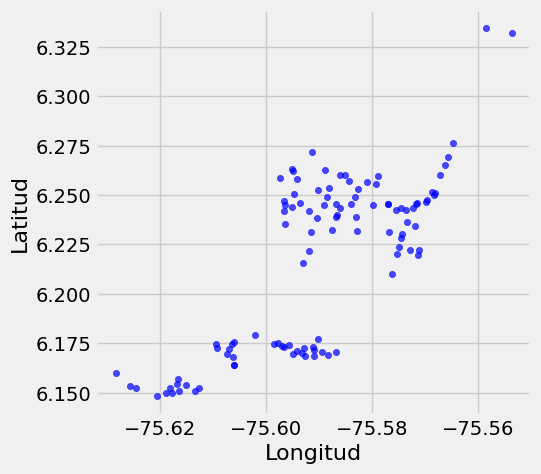

In [27]:
en_cicla1 = en_cicla.with_columns(
    'Latitud', en_cicla.apply(lambda x: float(x.replace(',', '.')), 'Latitud'),
    'Longitud', en_cicla.apply(lambda x: float(x.replace(',', '.')), 'Longitud')
)
# Crear un gráfico de dispersión con las coordenadas de latitud y longitud
en_cicla1.scatter("Longitud", "Latitud", color='blue', label='Estaciones EnCicla')

Miremos en un grafico de mapas latitud y longitud 

In [28]:
Marker.map_table(en_cicla1.select('Latitud', 'Longitud'))

Realicemos un calculo teórico de los tiempos entre estaciones, La tabla siguiente contiene  un cálculo teórico, tomando como separación entre calles de medellin de 100m, y a una velocidad promedio de 25km/h 

In [29]:
tiempos = Table().read_table("tiempos_de_viaje_teoricos.csv")

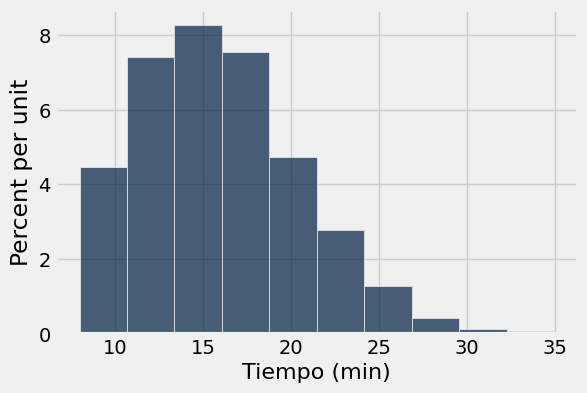

In [30]:
tiempos.hist("Tiempo (min)")

In [31]:
tiempos

Unnamed: 0,startA,startB,Distancia,Tiempo (min)
0,Moravia,Universidad,0.72,10.4
1,Moravia,Ruta N,1.2,12
2,Moravia,Robledo,3.52,19.7333
3,Moravia,Campus Nacional,2.8,17.3333
4,Moravia,Dian Alpujarra,3.2,18.6667
5,Moravia,Distrito Creativo,4.32,22.4
6,Moravia,Plaza de La Libertad,3.28,18.9333
7,Moravia,Parque de Las Luces II,3.04,18.1333
8,Moravia,Pies Descalzos I,3.6,20
9,Moravia,Area Metropolitana,3.36,19.2


In [32]:
tiempos.group("startA",np.mean)

startA,Unnamed: 0 mean,startB mean,Distancia mean,Tiempo (min) mean
Area Metropolitana,1133.15,,1.73583,13.7861
Auxiliar Metro Envigado,7505.06,,1.78833,13.9611
Aves María,9665.06,,3.175,18.5833
Bahía Ciclovia,10313,,2.13,15.1
Batallón,3077.11,,2.90167,17.6722
Biblioteca Sabaneta,9773.06,,3.195,18.65
Cafetero,7181.06,,2.44333,16.1444
Calle 19A Villa Carlota,5237.07,,3.18583,18.6194
Calle 51 Los Colores,3185.11,,2.94667,17.8222
Calle Nueva,9233.06,,3.34667,19.1556


In [33]:
tiempos.pivot("startA","startB", values='Tiempo (min)', collect=np.mean)

startB,Area Metropolitana,Auxiliar Metro Envigado,Aves María,Bahía Ciclovia,Batallón,Biblioteca Sabaneta,Cafetero,Calle 19A Villa Carlota,Calle 51 Los Colores,Calle Nueva,Campus Nacional,Ciudad del Río,Colombia,Dian Alpujarra,Distrito Creativo,Doña María,El MUA,Entre amigos,Envigado Centro,Estadio,Floresta,Florida Nueva,Guanteros,Ideas,Iglesia Alcalá,Industriales Metro,Industriales Metroplús,Juan Pablo II,La 33,La 65,La Barquereña,La Ultima Estación,Las Vegas 69 Sur,Los Naranjos,Los Urapanes,MAMM,Maria Luisa Calle,María Mulata,Metro Bello,Metro Envigado Norte,Metro Envigado Sur,Metróplus Cami,Moravia,Museo de Antioquia,Málaga,Nutibara,Orquídeas,Otra Banda,Palacio de la Cultura,Palacé,Parque 4 Elementos,Parque Bello,Parque Berrio,Parque Débora Arango,Parque Itaguí,Parque de Las Luces I,Parque de Las Luces II,Parque de Los Mangos,Parque de los Enamorados,Parque el Artista,Parques del río,Pedro Nel Gómez,Picacha la 76,Pies Descalzos I,Pies Descalzos II,Pista de Patinaje,Plaza Mayor,Plaza de La Libertad,Politécnico,Porton de Alcalá,Primer Parque de Laureles,Puente de la 77 Sur,Puente fundadores,Puente pan de Queso I,Puente pan de Queso II,Robledo,Rosales,Ruta N,Río Aburrá,SIU-UdeA,Sabaneta Centro,Sabaneta Metro,Salazar y Herrera,San Antonio,San Juan,San Pedro y San Pablo,Santa Ana,Santa Teresita,Suramericana,Telemedellín,Unicentro,Unidad Deportiva de Belén,Universidad,Villa Carlota,Villa Paula,Villas de Vallejuelos,Viva Envigado
Area Metropolitana,0,9.86667,18.9333,13.6,16.8,18.9333,13.6,16.5333,17.3333,19.4667,15.7333,16.5333,13.6,8.53333,11.7333,12.2667,11.2,18.1333,12,14.1333,16.8,14.6667,11.4667,12.5333,10.4,13.0667,11.4667,19.2,13.6,12,17.8667,9.86667,16.8,12.2667,10.9333,15.2,22.6667,14.6667,10.9333,10.1333,9.6,10.6667,19.2,11.2,9.6,14.1333,16.5333,13.3333,11.2,10.4,17.3333,11.2,10.9333,10.6667,11.2,9.06667,9.06667,11.7333,13.8667,14.1333,10.9333,14.6667,16.5333,9.33333,9.33333,9.86667,8.53333,8.26667,18.6667,11.2,20.2667,18.9333,10.1333,16,16,20.2667,15.7333,15.2,13.0667,13.6,18.4,16,15.7333,9.86667,13.3333,16.2667,16.8,16,12.8,16.8,13.3333,14.4,16.8,15.4667,12.2667,10.4,11.7333
Auxiliar Metro Envigado,9.86667,0,18.1333,12.8,18.6667,18.1333,14.4,14.6667,19.2,18.6667,17.6,14.6667,15.4667,9.86667,9.86667,13.6,9.33333,17.3333,10.1333,16,18.6667,16.5333,9.6,11.7333,8.53333,11.2,11.7333,20,14.4,13.8667,17.0667,8,16,12,9.06667,13.3333,23.4667,16.5333,10.1333,8.8,8.26667,12.5333,20.5333,12.5333,10.4,14.9333,18.4,15.2,12,9.6,16.5333,11.4667,11.7333,8.8,12,10.4,10.4,13.0667,15.7333,15.4667,12.8,15.4667,17.3333,11.2,11.2,8.53333,10.4,10.1333,16.8,9.33333,19.4667,18.1333,8.26667,15.2,15.2,22.1333,16.5333,16.5333,11.2,14.9333,17.6,15.7333,17.6,10.6667,15.2,18.1333,16,16.8,14.6667,14.9333,14.1333,15.2,18.1333,13.6,13.0667,9.06667,9.86667
Aves María,18.9333,18.1333,0,14.9333,23.4667,8.53333,24.5333,23.2,22.9333,9.06667,17.0667,23.2,19.7333,18.4,18.9333,14.6667,17.8667,8.8,18.6667,21.8667,24,22.4,18.1333,14.4,17.6,21.3333,21.8667,30.1333,24.5333,21.3333,10.1333,18.1333,10.1333,14.6667,18.1333,23.4667,33.6,24,16,18.9333,18.4,16.2667,12,15.7333,17.3333,25.0667,21.6,19.4667,15.7333,19.7333,10.6667,15.7333,16,17.8667,15.7333,17.8667,17.8667,22.6667,20.5333,12.8,21.3333,25.6,27.4667,19.7333,19.7333,17.6,19.4667,18.6667,26.4,17.8667,9.86667,9.6,18.4,12.5333,12.5333,19.4667,26.6667,11.7333,21.3333,13.3333,8.53333,10.9333,20.8,17.0667,22.6667,23.4667,10.1333,26.9333,20.5333,23.4667,24.2667,25.3333,10.1333,23.7333,14.6667,17.0667,20
Bahía Ciclovia,13.6,12.8,14.9333,0,18.1333,15.4667,19.2,16.8,17.6,16,16,16.8,14.4,13.0667,13.6,12,12,14.6667,11.7333,16.5333,18.6667,17.0667,11.7333,9.06667,12.2667,16,16.5333,24.8,19.2,16,12.8,12.8,14.4,10.4,12.8,18.1333,28.2667,18.6667,10.6667,13.6,13.0667,10.9333,18.9333,10.9333,12,19.7333,16.8,14.1333,10.4,14.4,12.2667,10.4,10.6667,12.5333,10.4,12.5333,12.5333,17.3333,15.2,13.8667,16,20.2667,22.1333,14.4,14.4,12.2667,14.1333,13.3333,21.0667,11.4667,14.6667,16.5333,13.0667,10.4,10.4,20.5333,21.3333,14.9333,16,13.333

# Join

In [35]:

# Tabla de estudiantes con IDs y nombres
students = Table().with_columns(
    'ID', [1, 2, 3, 4],
    'Name', ['Alice', 'Bob', 'Charlie', 'David']
)

# Tabla de calificaciones con IDs y calificaciones
grades = Table().with_columns(
    'ID', [1, 2, 3, 5],
    'Grade', ['A', 'B', 'C', 'D']
)

# Realizar un join en la columna 'ID'
merged_table = students.join('ID', grades)

# Mostrar la tabla resultante
merged_table.show()


ID,Name,Grade
1,Alice,A
2,Bob,B
3,Charlie,C


Condicionales

In [ ]:
# Programa que verifica si una persona es mayor de edad
def verificar_edad(edad):
    if edad >= 18:
        return "Eres mayor de edad."
    else:
        return "Eres menor de edad."

# Prueba
edad_persona = 20
print(verificar_edad(edad_persona))  # Salida: Eres mayor de edad.


In [36]:
# Programa que clasifica una nota como A, B, C o F
def clasificar_nota(nota):
    if nota >= 90:
        return "Tu nota es A."
    elif nota >= 80:
        return "Tu nota es B."
    elif nota >= 70:
        return "Tu nota es C."
    else:
        return "Tu nota es F."

# Prueba
nota_estudiante = 85
print(clasificar_nota(nota_estudiante))  # Salida: Tu nota es B.


Tu nota es B.


In [37]:
import random

def adivina_el_numero():
    numero_secreto = random.randint(1, 10)  # El número secreto es un número entre 1 y 10
    intentos = 3  # El jugador tiene 3 intentos

    print("¡Bienvenido al juego de adivinanza!")
    print("Adivina un número entre 1 y 10. Tienes 3 intentos.")

    for intento in range(intentos):
        adivinanza = int(input("Ingresa tu número: "))

        if adivinanza == numero_secreto:
            print("¡Felicidades! Adivinaste el número.")
            return
        elif adivinanza < numero_secreto:
            print("El número es mayor.")
        else:
            print("El número es menor.")
    
    print(f"Lo siento, no adivinaste el número. El número era {numero_secreto}.")

# Ejecutar el juego
adivina_el_numero()


¡Bienvenido al juego de adivinanza!
Adivina un número entre 1 y 10. Tienes 3 intentos.


Ingresa tu número:  11


El número es menor.


Ingresa tu número:  1


El número es mayor.


Ingresa tu número:  1


El número es mayor.
Lo siento, no adivinaste el número. El número era 3.


# Ejercicio: Clasificación de Números

Crea una función en Python que clasifique un número dado en una de las siguientes categorías:
1. Si el número es mayor a 0, el programa debe indicar que es positivo.
2. Si el número es menor a 0, debe indicar que es negativo.
3. Si el número es exactamente 0, debe indicar que es cero.
4. Si el número es múltiplo de 2, debe indicar que es par.
5. Si el número no es múltiplo de 2, debe indicar que es impar.
